In [1]:
import keras
import tensorflow 

Using TensorFlow backend.


In [2]:
import numpy as np

In [3]:
data = np.random.random((2,5))
labels = np.random.randint(3, size = (2,3))

data, labels

(array([[0.05002397, 0.5088092 , 0.23439021, 0.01998204, 0.94210546],
        [0.56239774, 0.47232503, 0.83061394, 0.18430192, 0.89288639]]),
 array([[2, 1, 1],
        [1, 2, 0]]))

In [4]:
from keras.utils import to_categorical, normalize

to_categorical(labels, num_classes=4)

array([[[0., 0., 1., 0.],
        [0., 1., 0., 0.],
        [0., 1., 0., 0.]],

       [[0., 1., 0., 0.],
        [0., 0., 1., 0.],
        [1., 0., 0., 0.]]], dtype=float32)

In [5]:
normalize(data, order=1)

array([[0.02849864, 0.28986843, 0.13353202, 0.01138376, 0.53671715],
       [0.1911276 , 0.16051691, 0.28227931, 0.06263393, 0.30344224]])

In [7]:
### sequences
from keras.preprocessing.sequence import pad_sequences

In [8]:
sequences = [
    [1,2,4,4],
    [3],
    [5,6,4,2,1,7,7,4,3],
    [3,3,4,3,2]
] ; sequences


[[1, 2, 4, 4], [3], [5, 6, 4, 2, 1, 7, 7, 4, 3], [3, 3, 4, 3, 2]]

In [11]:
padded_sequences = pad_sequences(sequences, maxlen=None, dtype='int32', 
                                 padding='pre',truncating='post',value=0.)
padded_sequences

array([[0, 0, 0, 0, 0, 1, 2, 4, 4],
       [0, 0, 0, 0, 0, 0, 0, 0, 3],
       [5, 6, 4, 2, 1, 7, 7, 4, 3],
       [0, 0, 0, 0, 3, 3, 4, 3, 2]])

In [14]:
#skip grams -- deals with correlated tasks mostly in nlp
#its done in a sequence by sequence
from keras.preprocessing.sequence import skipgrams

grams = skipgrams(padded_sequences[0], vocabulary_size=8, 
                  window_size=1, negative_samples=1., shuffle=True, 
                  categorical=False)
grams


([[1, 2],
  [4, 2],
  [2, 7],
  [2, 1],
  [4, 4],
  [4, 7],
  [1, 6],
  [2, 4],
  [4, 5],
  [4, 4],
  [2, 4],
  [4, 4]],
 [1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1])

In [16]:
text = """
My name is Geoffrey.
I like data science.
Let's do keep learning.
Keras, my fav lib
"""

In [16]:
from keras.preprocessing.text import text_to_word_sequence

words = text_to_word_sequence(text, lower= True, split= " ")

words

['my',
 'name',
 'is',
 'geoffrey',
 'i',
 'like',
 'data',
 'science',
 "let's",
 'do',
 'keep',
 'learning',
 'keras',
 'my',
 'fav',
 'lib']

In [17]:
from keras.preprocessing.text import one_hot

one_hot(text, n=8, lower=True, split=" ")

[4, 1, 3, 1, 6, 2, 2, 1, 6, 6, 7, 2, 6, 4, 1, 6]

In [12]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=None, lower=True, split = " ")

In [17]:
#tokenizer.fit_on_sequence
tokenizer.fit_on_texts([text])

In [20]:
tokenizer.texts_to_sequences([text])

[[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 1, 14, 15]]

In [21]:
tokenizer.texts_to_matrix([text], 'count')

array([[0., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])

In [22]:
tokenizer.texts_to_matrix(['Data sience is fun'], 'count')

array([[0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [25]:
print(tokenizer.texts_to_matrix.__doc__)

Convert a list of texts to a Numpy matrix.

        # Arguments
            texts: list of strings.
            mode: one of "binary", "count", "tfidf", "freq".

        # Returns
            A Numpy matrix.
        


In [22]:
tokenizer.word_counts

OrderedDict([('my', 2),
             ('name', 1),
             ('is', 1),
             ('geoffrey', 1),
             ('i', 1),
             ('like', 1),
             ('data', 1),
             ('science', 1),
             ("let's", 1),
             ('do', 1),
             ('keep', 1),
             ('learning', 1),
             ('keras', 1),
             ('fav', 1),
             ('lib', 1)])

In [28]:
#image functions
from sklearn.datasets import load_sample_images
import matplotlib.pyplot as plt
import PIL

%matplotlib inline

dataset = load_sample_images()


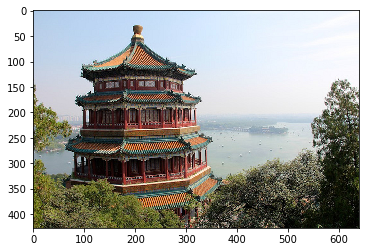

In [29]:
plt.imshow(dataset.images[0])
plt.show()

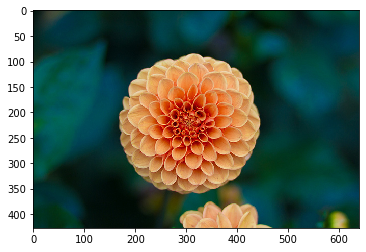

In [32]:
plt.imshow(dataset.images[1])
plt.show()

In [34]:
from keras.preprocessing.image import ImageDataGenerator

idg = ImageDataGenerator(featurewise_center=False, 
                         samplewise_center=False,
                         featurewise_std_normalization=False, 
                         samplewise_std_normalization=False, zca_epsilon=False,
                         rotation_range=10., width_shift_range=0., 
                         height_shift_range=0., shear_range=0., zoom_range=0., 
                         fill_mode='nearest',cval=0,
                         horizontal_flip=True,  vertical_flip=True,rescale=None,
                         preprocessing_function=None)

In [35]:
idg.fit(dataset.images)

In [37]:
it = idg.flow(np.array(dataset.images), np.array([1,1]), batch_size=1)

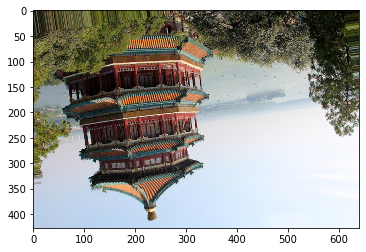

In [53]:
plt.imshow(np.array(next(it)[0][0,:,:,:], dtype = 'uint8'))

In [51]:
tokenizer.index_word

{1: 'my',
 2: 'name',
 3: 'is',
 4: 'geoffrey',
 5: 'i',
 6: 'like',
 7: 'data',
 8: 'science',
 9: "let's",
 10: 'do',
 11: 'keep',
 12: 'learning',
 13: 'keras',
 14: 'fav',
 15: 'lib'}

In [52]:
tokenizer.word_index

{'my': 1,
 'name': 2,
 'is': 3,
 'geoffrey': 4,
 'i': 5,
 'like': 6,
 'data': 7,
 'science': 8,
 "let's": 9,
 'do': 10,
 'keep': 11,
 'learning': 12,
 'keras': 13,
 'fav': 14,
 'lib': 15}

In [48]:
x = tokenizer.index_word

In [49]:
x.items()

dict_items([(1, 'my'), (2, 'name'), (3, 'is'), (4, 'geoffrey'), (5, 'i'), (6, 'like'), (7, 'data'), (8, 'science'), (9, "let's"), (10, 'do'), (11, 'keep'), (12, 'learning'), (13, 'keras'), (14, 'fav'), (15, 'lib')])

In [2]:
import scipy.misc

In [15]:
from PIL import Image
import matplotlib.pyplot as plt
from IPython.display import display
import numpy as np

%matplotlib inline

In [22]:
img = Image.open('C:\\ai\\images\\atari-1.png')

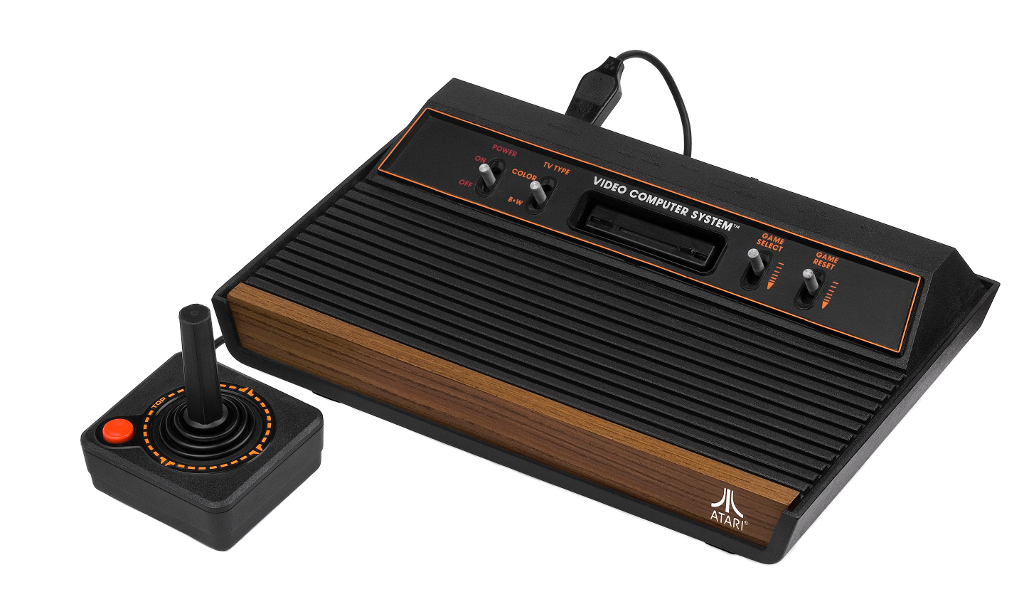

In [23]:
img.load()
img

In [24]:
img.size

(1024, 598)

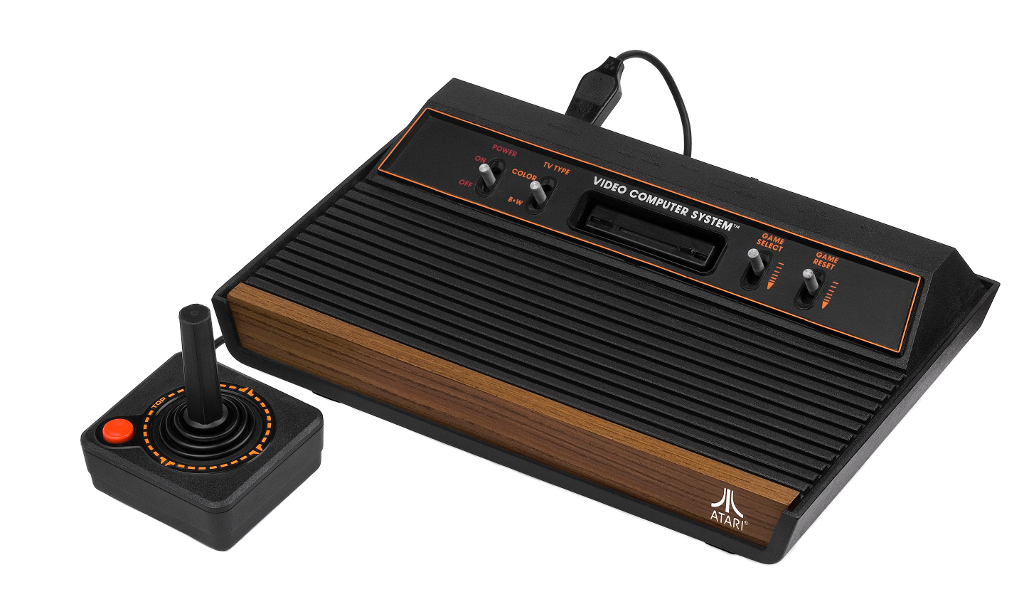

In [27]:
img.resize((36, 36))
img

In [3]:
from keras.applications .vgg16 import VGG16

In [4]:
base_model = VGG16(weights='imagenet', include_top = True)

Exception: URL fetch failure on https://github.com/fchollet/deep-learning-models/releases/download/v0.1/vgg16_weights_tf_dim_ordering_tf_kernels.h5: None -- [Errno 11001] getaddrinfo failed

In [1]:
import tensorflow
import keras

Using TensorFlow backend.


In [2]:
from keras.preprocessing import image

In [3]:
from keras.applications.mobilenet import decode_predictions

Help on function wrapper in module keras.applications:

wrapper(*args, **kwargs)



In [3]:
import tensorflow
import keras

Using TensorFlow backend.


In [ ]:
from keras.wrappers.scikit_learn import 